In [1]:

import pandas as pd
from google.cloud import bigquery


client = bigquery.Client()
def query(sql):
    query_job = client.query(
        sql,
        # Location must match that of the dataset(s) referenced in the query.
        location="US",
    )  # API request - starts the query
    
    df = query_job.to_dataframe()
    return df

# 普瓦松分佈
* when the probality is very small , we could use poission distribution to estimate
* the probabilty of the evnet in certian occurence


In [2]:
sql = """
SELECT
  browser,
  count(1)/30 as cc
FROM
  `pixnet-gt.pixinsight_data.article_visitor_log_1st_1_100_201910*`
GROUP BY
  browser
"""

In [3]:
df = query(sql)
df.head()

,browser,cc
0,Opera,19.600000
1,Baidu Browser,0.166667
2,IE,4008.633333
3,Firefox,2093.100000
4,NetFront NX,0.433333


In [4]:
df.to_csv("./article_visitor_log_1st_1_100_201910.csv")
df=pd.read_csv("./article_visitor_log_1st_1_100_201910.csv")

In [5]:
df[df['browser']=='Opera Mini']

,Unnamed: 0,browser,cc
32,32,Opera Mini,3.433333


In [6]:
Opera_Mini_mean = df[df['browser']=='Opera Mini']
Opera_Mini_mean = Opera_Mini_mean.cc.tolist()[0]

# Problem
* x = the number of opera occurrence
* mean = 3.433333333333333


In [7]:
from scipy.stats import poisson
ps = []
for i in range(10):
    p = poisson.cdf(i,Opera_Mini_mean)
    ps.append(1-p)

Populating the interactive namespace from numpy and matplotlib


/Users/kent/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poisson']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/Users/kent/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kent/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


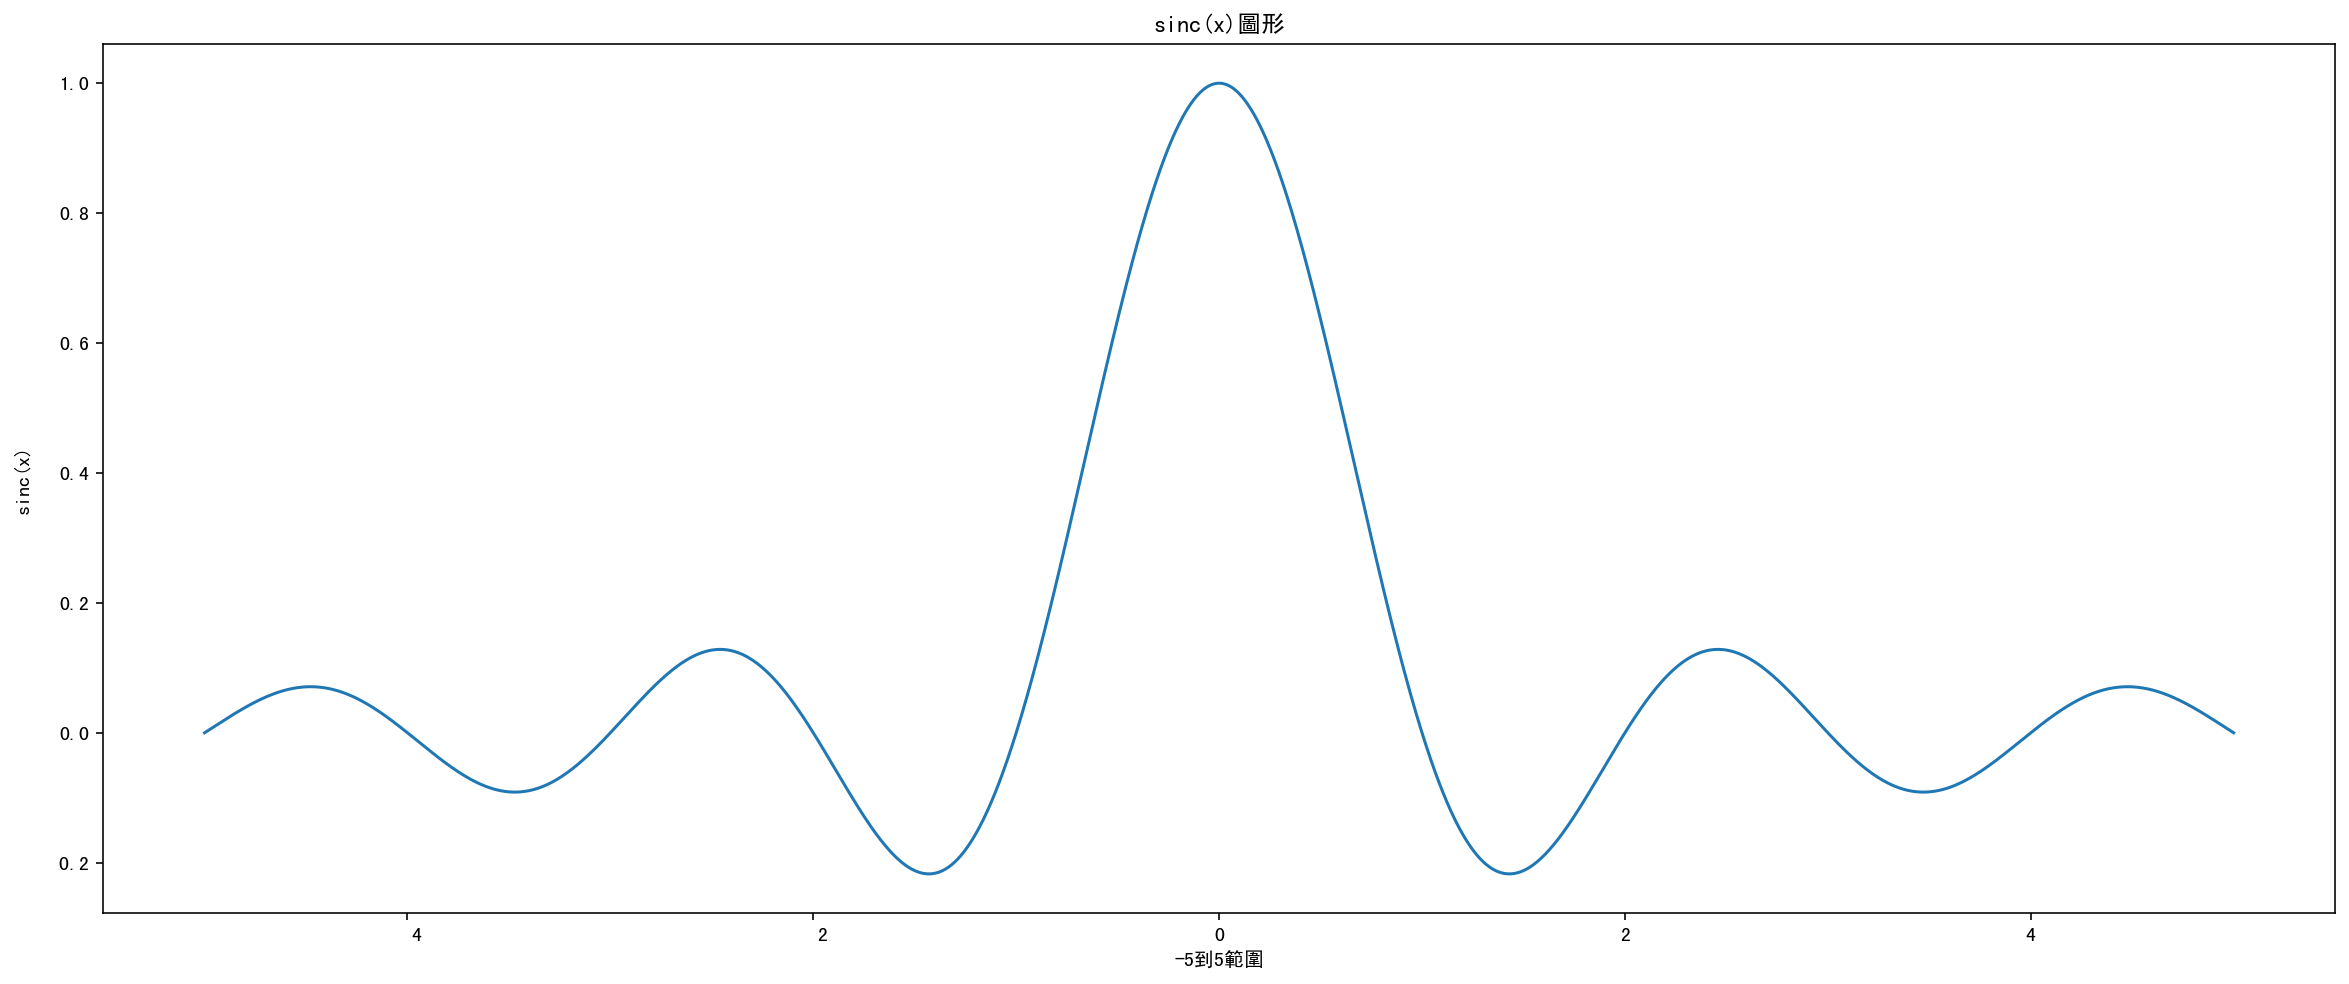

In [8]:
%pylab inline
x = linspace(-5, 5, 2000)
plot(x, sinc(x))
plt.gcf().set_size_inches(20, 8)
plt.title(u'sinc(x)圖形', )
plt.xlabel(u'-5到5範圍', )
plt.ylabel(u'sinc(x)', )
plt.tick_params(axis ='both', labelsize=10)
plt.savefig('sample.png')

Populating the interactive namespace from numpy and matplotlib


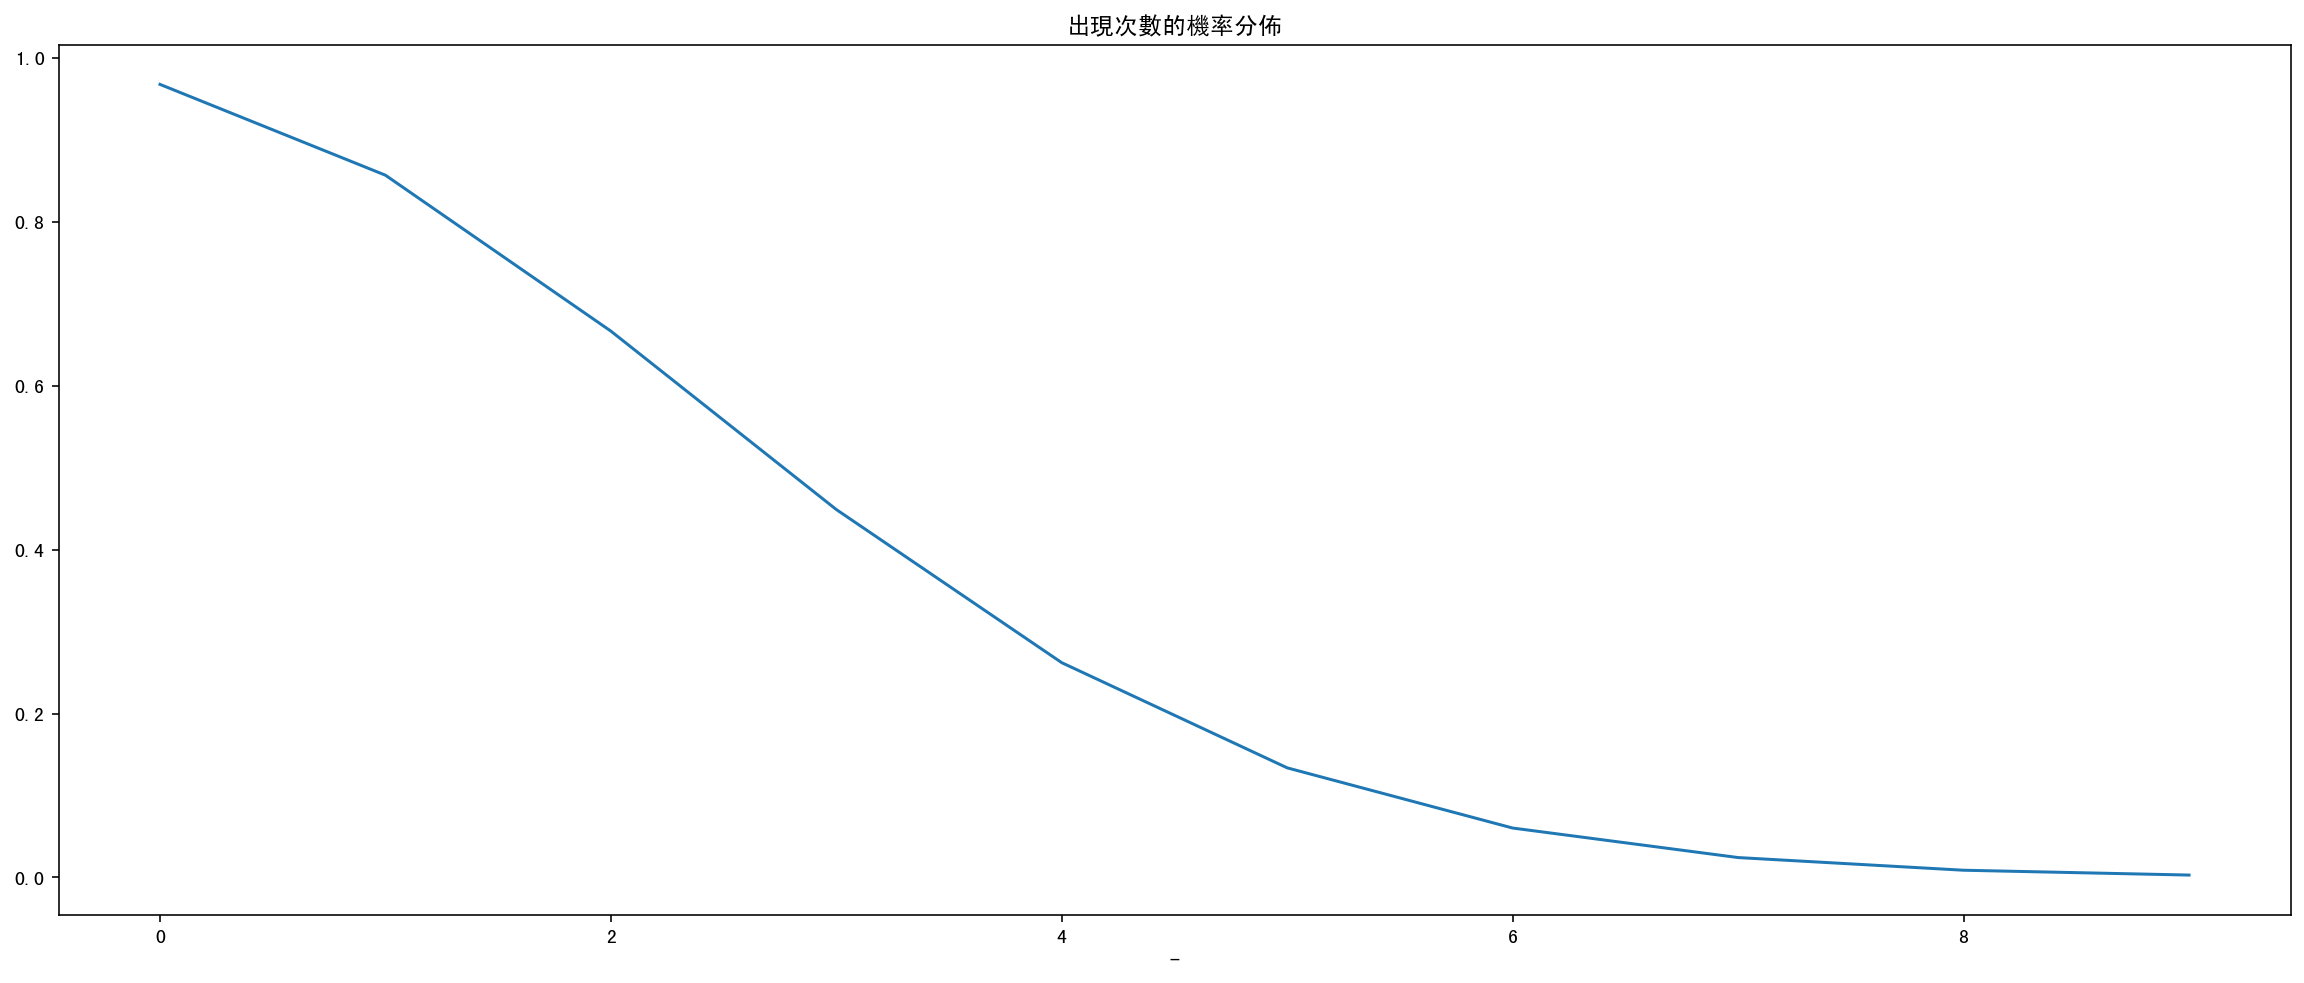

In [9]:
%pylab inline
x = linspace(-5, 5, 2000)
plot(range(10), ps)
plt.gcf().set_size_inches(20, 8)
plt.title(u'出現次數的機率分佈', )
plt.xlabel(u'-', )
plt.ylabel(u'', )
plt.tick_params(axis ='both', labelsize=10)
plt.savefig('sample.png')

In [10]:
sql = """
SELECT
  date,count(1) as cc
FROM
  `pixnet-gt.pixinsight_data.article_visitor_log_1st_1_100_201909*`
where browser = 'Opera Mini'
group by date
order by date

"""

In [11]:
query(sql)

,date,cc
0,20190901,4
1,20190902,1
2,20190903,4
3,20190904,2
4,20190905,5
5,20190907,5
6,20190908,3
7,20190909,7
8,20190910,3
9,20190911,1
